<a href="https://colab.research.google.com/github/MachineLearningSolutions/MLCodes/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

simple_regression=False

#Create a dataset
if simple_regression:
  x = np.array([1, 2, 3, 4, 5, 6])  #independent variable  - simple linear regression
else:
  x = np.array ([[1,2,3,4,5,6],[2,5,7,11,13,19]]) #independent variable  - multiple linear regression
  
y = np.array([8, 17, 12, 40, 32,50])  #dependent variable


#Create a linear regression model
model = LinearRegression(fit_intercept=True, normalize=False)

#Fit the model and calculate coefficients
if simple_regression:
  x_2d=x.reshape((-1, 1))   #For simple linear regression
else:
  x_2d=np.transpose(x)    #For multiple linear regression
  
model.fit(x_2d,y)


#Print coefficients
print('bias:', model.intercept_)
print('coefficients:', model.coef_)

bias: 6.573033707865175
coefficients: [-6.93258427  4.65168539]


In [25]:
#Manually calculating coefficients from closed form solution:
x_original=np.copy(x)
y_original=np.copy(y)

if simple_regression:
  x=(x.reshape((-1, 1))) #Reshape to make x 2D  - For simple linear regression
else:
  x=np.transpose(x)   #For multiple linear regression
  
x=np.insert(x, 0, 1,1) #Insert dummy variable 1 to handle bias
y=(y.reshape((-1, 1))) #Reshape to make y 2D 

#Manual calculation of coefficients
coeffs=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.transpose(x)),y)  #  inv(X'X)X'y
print(coeffs)

[[ 6.57303371]
 [-6.93258427]
 [ 4.65168539]]


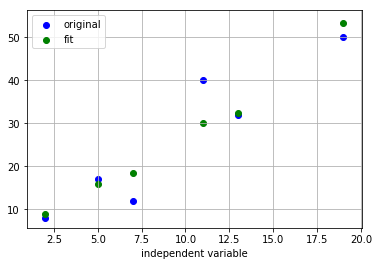

In [28]:
import matplotlib.pyplot as plt

#Visualize the fit
y_pred=np.matmul(x,coeffs)

if simple_regression:
  #Plot original data
  plt.scatter(x_original, y_original,c='b',label='original')  
  #Plot the fit
  plt.scatter(x_original, y_pred,c='g',label='fit') 
else:
  #Plot original data
  plt.scatter(x_original[1,:], y_original,c='b',label='original')  
  #Plot the fit
  plt.scatter(x_original[1,:], y_pred,c='g',label='fit') 

#Add grid
plt.grid(True)
plt.xlabel('independent variable')
plt.legend()
